In [326]:
#importing required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

#The command plt.style.use("seaborn-v0_8") is used to change the overall look 
## - and feel of all the data visualizations created using the Matplotlib library in Python

In [327]:
#path to locate files
DATA_DIR = r"C:\Users\thanu\Downloads\archive"

In [328]:
#loading the files
users = pd.read_csv(os.path.join(DATA_DIR, "users.csv"))
restaurants = pd.read_csv(os.path.join(DATA_DIR, "restaurants.csv"))
interactions = pd.read_csv(os.path.join(DATA_DIR, "interactions.csv"))
context = pd.read_csv(os.path.join(DATA_DIR, "context.csv"))

In [329]:
#verifying if the files are successfully loaded or not
datasets = {
    "users": users,
    "restaurants": restaurants,
    "interactions": interactions,
    "context": context
}

for name, df in datasets.items():
    print(f"{name}: {df.shape}")

users: (1000, 4)
restaurants: (500, 6)
interactions: (10000, 4)
context: (10000, 4)


In [330]:
users.head()

,user_id,age,gender,preferred_cuisine
0,1,56,Male,Indian
1,2,46,Other,Chinese
2,3,32,Male,French
3,4,25,Female,Mexican
4,5,38,Other,Thai


In [331]:
restaurants.head()

,restaurant_id,name,cuisine,rating,location,price_range
0,1,"Banks, Flynn and Joseph",Mexican,2.7,Chicago,$70
1,2,"Garza, Melton and Powell",Mexican,4.4,Los Angeles,$110
2,3,Frederick PLC,Japanese,3.5,Los Angeles,$110
3,4,"Sullivan, Gray and Price",Thai,4.4,Chicago,$70
4,5,Hurst-Frederick,Japanese,4.8,Los Angeles,$110


In [332]:
interactions.head()

,user_id,restaurant_id,interaction_type,timestamp
0,314,409,like,1/4/2024 10:43
1,869,424,click,1/5/2024 3:46
2,368,32,click,1/6/2024 9:12
3,429,472,visit,1/4/2024 11:11
4,830,28,like,1/3/2024 15:21


In [333]:
context.head()

,interaction_id,location,time_of_day,weather
0,1,Chicago,Evening,Sunny
1,2,Houston,Night,Rainy
2,3,New York,Evening,Snowy
3,4,San Francisco,Afternoon,Sunny
4,5,Chicago,Evening,Sunny


In [334]:
#### Checking how many rows & columns each dataset has

In [335]:
print(users.shape)
print(users.columns)

(1000, 4)
Index(['user_id', 'age', 'gender', 'preferred_cuisine'], dtype='object')


In [336]:
print(restaurants.shape)
print(restaurants.columns)

(500, 6)
Index(['restaurant_id', 'name', 'cuisine', 'rating', 'location',
       'price_range'],
      dtype='object')


In [337]:
print(interactions.shape)
print(interactions.columns)

(10000, 4)
Index(['user_id', 'restaurant_id', 'interaction_type', 'timestamp'], dtype='object')


In [338]:
print(context.shape)
print(context.columns)

(10000, 4)
Index(['interaction_id', 'location', 'time_of_day', 'weather'], dtype='object')


In [339]:
print(social_graph.shape)
print(social_graph.columns)

(3000, 2)
Index(['user_a', 'user_b'], dtype='object')


In [340]:
#Displaying column Data Types
users.info()
restaurants.info()
interactions.info()
context.info()
social_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1000 non-null   int64 
 1   age                1000 non-null   int64 
 2   gender             1000 non-null   object
 3   preferred_cuisine  1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  500 non-null    int64  
 1   name           500 non-null    object 
 2   cuisine        500 non-null    object 
 3   rating         500 non-null    float64
 4   location       500 non-null    object 
 5   price_range    500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
Range

In [341]:
####Checking for missing values in each dataset

In [342]:
users.isna().sum()

user_id              0
age                  0
gender               0
preferred_cuisine    0
dtype: int64

In [343]:
restaurants.isna().sum()

restaurant_id    0
name             0
cuisine          0
rating           0
location         0
price_range      0
dtype: int64

In [344]:
interactions.isna().sum()

user_id             0
restaurant_id       0
interaction_type    0
timestamp           0
dtype: int64

In [345]:
context.isna().sum()

interaction_id    0
location          0
time_of_day       0
weather           0
dtype: int64

In [346]:
social_graph.isna().sum()

user_a    0
user_b    0
dtype: int64

In [347]:
####Cehcking for duplicate rows in each dataset

In [348]:
users.duplicated().sum()

0

In [349]:
restaurants.duplicated().sum()

0

In [350]:
interactions.duplicated().sum()

0

In [351]:
context.duplicated().sum()

0

In [352]:
social_graph.duplicated().sum()

0

In [353]:
interactions["timestamp"] = pd.to_datetime(interactions["timestamp"])
interactions.rename(columns={"timestamp": "order_time"}, inplace=True)


In [354]:
df = interactions.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)

In [355]:
df = df.merge(
    users,
    on="user_id",
    how="left"
)

In [356]:
df.head()

,user_id,restaurant_id,interaction_type,order_time,name,cuisine,rating,location,price_range,age,gender,preferred_cuisine
0,314,409,like,2024-01-04 10:43:00,Meadows Inc,Chinese,3.1,New York,$80,41,Other,Thai
1,869,424,click,2024-01-05 03:46:00,"Lane, Lee and Thomas",Mexican,3.0,New York,$80,47,Female,Mexican
2,368,32,click,2024-01-06 09:12:00,"Nelson, Perry and Murphy",Mexican,5.0,Los Angeles,$110,39,Male,Thai
3,429,472,visit,2024-01-04 11:11:00,Jacobson LLC,Mexican,2.5,San Francisco,$130,50,Other,Japanese
4,830,28,like,2024-01-03 15:21:00,"Lambert, Kent and Chung",Japanese,4.9,Los Angeles,$110,51,Female,American


In [357]:
df["order_time"] = pd.to_datetime(df["order_time"])


In [358]:
df["hour"] = df["order_time"].dt.hour


In [359]:
df[["order_time", "hour"]].head() #for reference


,order_time,hour
0,2024-01-04 10:43:00,10
1,2024-01-05 03:46:00,3
2,2024-01-06 09:12:00,9
3,2024-01-04 11:11:00,11
4,2024-01-03 15:21:00,15


In [360]:
df["hour"].value_counts().sort_index()
#Food Purchases/hour

hour
0     412
1     415
2     400
3     416
4     435
5     396
6     424
7     386
8     429
9     424
10    423
11    401
12    420
13    431
14    432
15    469
16    432
17    410
18    438
19    386
20    424
21    429
22    425
23    343
Name: count, dtype: int64

<Axes: title={'center': 'Interactions by Hour'}, xlabel='hour'>

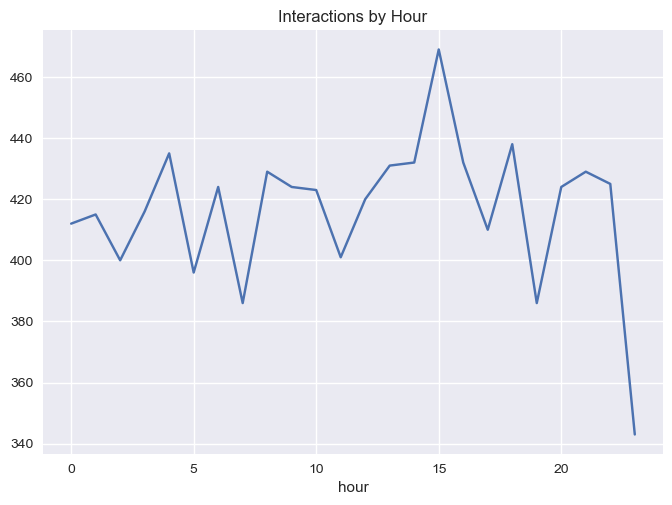

In [361]:
#Time based analysis
df["hour"].value_counts().sort_index().plot(
    kind="line",
    title="Interactions by Hour"
)

In [489]:
time_cuisine = (
    df.groupby(["hour", "cuisine"])
    .size()
    .reset_index(name="count")
)


In [492]:
pivot_tc = time_cuisine.pivot(index="hour", columns="cuisine", values="count").fillna(0)
pivot_tc

cuisine,American,Chinese,French,Indian,Italian,Japanese,Mexican,Thai
hour,,,,,,,,
0,49,46,40,50,48,57,68,54
1,46,46,62,43,46,57,65,50
2,40,56,51,48,51,51,63,40
3,54,49,43,52,46,40,71,61
4,55,54,61,52,57,57,52,47
5,41,56,55,40,44,53,58,49
6,47,48,55,43,54,53,70,54
7,42,53,38,52,40,52,59,50
8,41,60,47,50,48,56,82,45


<Axes: title={'center': 'Interactions by Day'}, xlabel='day'>

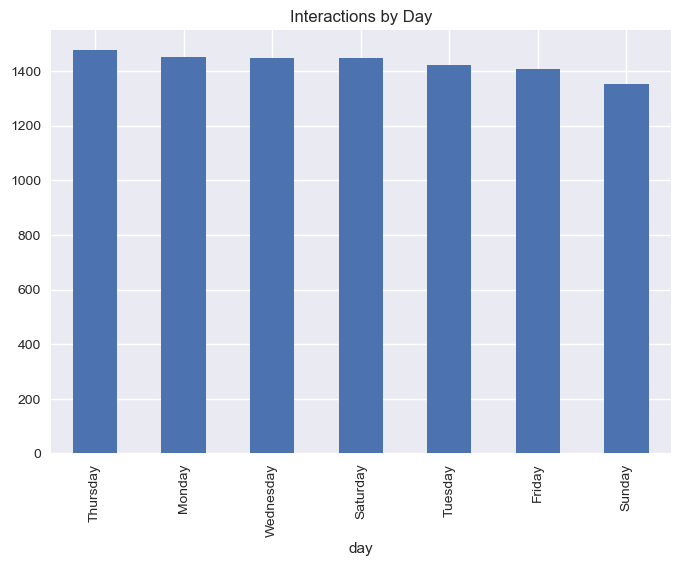

In [362]:
df["day"] = df["order_time"].dt.day_name()

df["day"].value_counts().plot(
    kind="bar",
    title="Interactions by Day"
)


In [363]:
#To understand the user behaviour
df["interaction_type"].value_counts()

interaction_type
click     4857
like      2085
visit     2014
review    1044
Name: count, dtype: int64

<Axes: title={'center': 'Interaction Type Distribution'}, xlabel='interaction_type'>

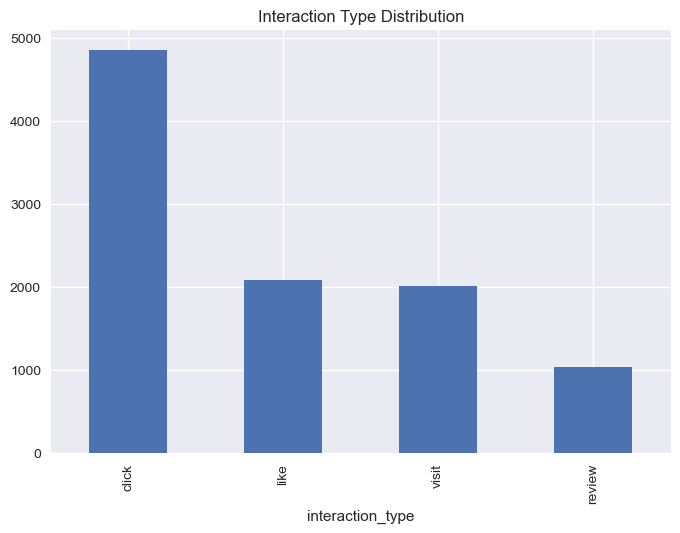

In [364]:
df["interaction_type"].value_counts().plot(kind="bar", title="Interaction Type Distribution")
#Most user interactions are clicks, followed by visits and likes, indicating browsing behavior dominates before ordering.

In [365]:
df["cuisine"].value_counts().head(10)
#Certain cuisines dominate user interactions, making them strong candidates for default recommendations.

cuisine
Mexican     1514
Japanese    1308
Thai        1272
Chinese     1264
French      1221
Italian     1189
Indian      1174
American    1058
Name: count, dtype: int64

<Axes: title={'center': 'Top Cuisines'}, xlabel='cuisine'>

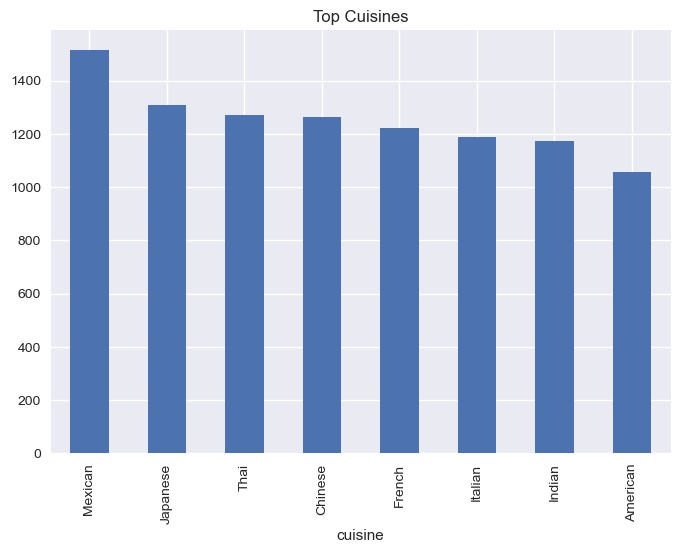

In [366]:
df["cuisine"].value_counts().head(10).plot(
    kind="bar",
    title="Top Cuisines"
)


In [367]:
popular_restaurants = (
    df["name"]
    .value_counts()
    .reset_index()
)

popular_restaurants.columns = ["restaurant_name", "interaction_count"]

popular_restaurants.head(10)


,restaurant_name,interaction_count
0,Johnson Inc,71
1,White LLC,49
2,Robinson Group,47
3,Thomas and Sons,46
4,Smith Ltd,45
5,Kelly LLC,43
6,Johnson PLC,42
7,Smith LLC,41
8,Brown and Sons,39
9,Walsh-Kane,35


In [368]:
df.head() #cohort analysis for reference

,user_id,restaurant_id,interaction_type,order_time,name,cuisine,rating,location,price_range,age,gender,preferred_cuisine,hour,day
0,314,409,like,2024-01-04 10:43:00,Meadows Inc,Chinese,3.1,New York,$80,41,Other,Thai,10,Thursday
1,869,424,click,2024-01-05 03:46:00,"Lane, Lee and Thomas",Mexican,3.0,New York,$80,47,Female,Mexican,3,Friday
2,368,32,click,2024-01-06 09:12:00,"Nelson, Perry and Murphy",Mexican,5.0,Los Angeles,$110,39,Male,Thai,9,Saturday
3,429,472,visit,2024-01-04 11:11:00,Jacobson LLC,Mexican,2.5,San Francisco,$130,50,Other,Japanese,11,Thursday
4,830,28,like,2024-01-03 15:21:00,"Lambert, Kent and Chung",Japanese,4.9,Los Angeles,$110,51,Female,American,15,Wednesday


In [369]:
df.shape

(10000, 14)

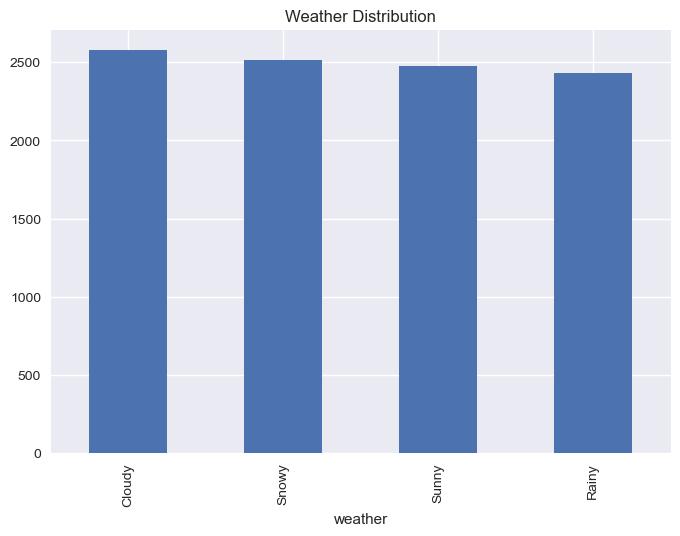

In [426]:
context["weather"].value_counts()
context["weather"].value_counts().plot(
    kind="bar",
    title="Weather Distribution"
)
plt.show()


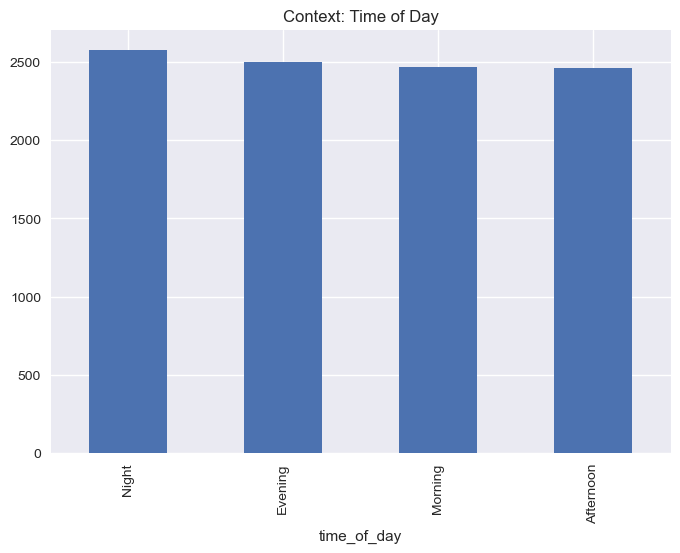

In [428]:
context["time_of_day"].value_counts()
context["time_of_day"].value_counts().plot(
    kind="bar",
    title="Context: Time of Day"
)
plt.show()


In [432]:
user_summary = (
    df.groupby("user_id")
    .agg(
        total_interactions=("interaction_type", "count"),
        unique_restaurants=("restaurant_id", "nunique"),
        preferred_cuisine=("preferred_cuisine", "first")
    )
    .reset_index()
)

user_summary.head(10)


,user_id,total_interactions,unique_restaurants,preferred_cuisine
0,1,12,12,Indian
1,2,9,9,Chinese
2,3,5,5,French
3,4,8,8,Mexican
4,5,6,6,Thai
5,6,9,9,Mexican
6,7,11,11,French
7,8,11,11,Japanese
8,9,9,9,Thai
9,10,10,10,American


In [434]:
user_summary["user_type"] = np.where(
    user_summary["unique_restaurants"] >= 5,
    "Explorer",
    "Loyal"
)

user_summary["user_type"].value_counts()


user_type
Explorer    971
Loyal        29
Name: count, dtype: int64

In [498]:
preference_gap = (
    df.groupby(["preferred_cuisine", "cuisine"])
    .size()
    .reset_index(name="interaction_count")
)

preference_gap.sort_values("interaction_count").head(10)


,preferred_cuisine,cuisine,interaction_count
24,Indian,American,110
56,Thai,American,112
31,Indian,Thai,117
16,French,American,118
27,Indian,Indian,120
28,Indian,Italian,121
29,Indian,Japanese,122
25,Indian,Chinese,123
40,Japanese,American,127
36,Italian,Italian,132


In [448]:
price_analysis = (
    df.groupby("price_range")
    .size()
    .reset_index(name="interaction_count")
)

price_analysis


,price_range,interaction_count
0,$110,1840
1,$130,1669
2,$70,3995
3,$80,2496


In [454]:
popular_restaurants = (
    df["name"]
    .value_counts()
    .head(5)
    .index
    .tolist()
)
popular_restaurants

['Johnson Inc', 'White LLC', 'Robinson Group', 'Thomas and Sons', 'Smith Ltd']

In [ ]:
#Recommendations

In [458]:
def recommend_by_time(hour, n=5):
    return (
        df[df["hour"] == hour]["name"]
        .value_counts()
        .head(n)
        .index
        .tolist()
    )


In [474]:
recommend_by_time(0, n=5)

['Taylor-Cooke',
 'Scott-Hale',
 'Gilbert-Martin',
 'Kemp-Bridges',
 'Lin, Cherry and Patel']

In [476]:
def hybrid_recommendation(user_id, hour, n=5):
    pref_recs = recommend_by_cuisine(user_id, n)
    time_recs = recommend_by_time(hour, n)
    
    combined = pref_recs + time_recs + popular_restaurants
    return list(dict.fromkeys(combined))[:n]


In [480]:
hybrid_recommendation(1, 20, n=5)

['Jackson PLC',
 'Garcia Ltd',
 'David, Maldonado and Mcbride',
 'Davis, Pope and Lewis',
 'Ray-Gonzales']

In [503]:
def recommend_location_time_cuisine(user_id, location, hour, n=5):
    # User preference
    pref_cuisine = df.loc[df["user_id"] == user_id, "preferred_cuisine"].iloc[0]
    
    # Strict filter (location + time + cuisine)
    recs = (
        df[
            (df["location"] == location) &
            (df["hour"] == hour) &
            (df["cuisine"] == pref_cuisine)
        ]["name"]
        .value_counts()
        .head(n)
        .index
        .tolist()
    )
    
    if len(recs) < n:
        more = recommend_location_time(location, hour, n)
        recs += more
    
    return list(dict.fromkeys(recs))[:n]


In [513]:
recommend_location_time_cuisine(
    user_id=5,
    location="New York",
    hour=20,
    n=5
)


['Burke-James',
 'Baker Inc',
 'Dixon, Holt and Bradshaw',
 'Preston PLC',
 'Schwartz-Aguilar']